<p style = "background-color : #39d649ff; border-radius: 5px 5px; padding : 15px"><strong>

# Сегментация клиентов на основе RFM-анализа и машинного обучения

<p style = "background-color : #39d649ff; border-radius: 5px 5px; padding : 15px"><strong>




<p style = "background-color : #59f068; border-radius: 5px 5px; padding : 10px"><strong>
<span style="color:#000">1. Постановка задачи:</span>


В данном проекте решается бизнес-задача в области маркетинга. Необходимо произвести сегментацию клиентов на основе их покупательской способности, частоты совершения заказов и срока давности последнего заказа, а также определить оптимальную стратегию взаимодействия с ними.
<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных.

**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку набора данных.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать категории товаров и клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.



<p style = "background-color : #59f068; border-radius: 5px 5px; padding : 10px"><strong>
<span style="color:#000">2. Знакомство с данными.</span>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn import mixture
from sklearn import manifold
from sklearn import pipeline
from sklearn import preprocessing

from sklearn import cluster
from sklearn import metrics
from sklearn import model_selection
from sklearn import decomposition
from sklearn import ensemble
import warnings

from IPython.display import display, HTML


warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

Для начала познакомимся с нашими данными:

In [75]:
data = pd.read_csv("data.csv",
    encoding="ISO-8859-1",
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


<div class="alert alert-info">

Итак, у нас есть данные о более чем полумиллионе транзакций. Каждая из них описывается следующими признаками:

* **InvoiceNo** — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* **Stock Code** — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* **Description** — название товара;
* **Quantity** — количество каждого товара за транзакцию;
* **InvoiceDate** — дата и время выставления счёта/проведения транзакции;
* **UnitPrice** — цена за единицу товара в фунтах стерлингов;
* **CustomerID** — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* **Country** — название страны, в которой проживает клиент.

Проведём анализ структуры таблицы.


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


Столбцы, в которых есть хотя бы один пропуск:
* InvoiceNo
* StockCode
* Description
* CustomerID
* Country

In [77]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Судя по описанию задачи, нам должны были предоставить данные за годовой период — проверим, так ли это.


In [78]:
data['InvoiceDate']  = pd.to_datetime(data['InvoiceDate'])
start_date = data['InvoiceDate'].min()
end_date = data['InvoiceDate'].max()
print(f'Данные начинаются в следующий промежуток времени {start_date} и заканчиваются {end_date}')

Данные начинаются в следующий промежуток времени 2010-12-01 08:26:00 и заканчиваются 2011-12-09 12:50:00


Выясним пару моментов:

1) Каково максимальное количество товаров в заказе (Quantity)?

2) Каково минимальное количество товаров в заказе (Quantity)?

3) Сколько, согласно данным, стоит самый дешёвый товар (за исключением товаров с отрицательной стоимостью)?
4) Сколько уникальных клиентов покупали товары за период выгрузки датасета?

5) Сколько уникальных стран содержится в столбце Country (исключая специальный код 'Unspecified', обозначающий неопределенную страну)?

6) Укажем идентификатор самого популярного товара (StockCode):

In [79]:
max_quan = data['Quantity'].max()
min_quan = data['Quantity'].min()
min_price = data[data['UnitPrice'] >= 0]['UnitPrice'].min()
print(f'Максимальное количество товаров в заказе: {max_quan} шт;\n'
      f'Минимальное количество товаров в заказе: {min_quan} шт;\n'
      f'Самый дешевый товар: £{min_price}.')

Максимальное количество товаров в заказе: 80995 шт;
Минимальное количество товаров в заказе: -80995 шт;
Самый дешевый товар: £0.0.


In [80]:
un_id = data['CustomerID'].value_counts().count()
un_countries = data[data['Country'] != 'Unspecified']['Country'].nunique()
most_popular = data['StockCode'].value_counts().index[0]
print(f'Количество уникальных клиентов: {un_id} шт;\n'
      f'Уникальных стран (Кроме Unspecifed): {un_countries} шт;\n'
      f'Идентификатор самого популярного товара: {most_popular}.')

Количество уникальных клиентов: 4372 шт;
Уникальных стран (Кроме Unspecifed): 37 шт;
Идентификатор самого популярного товара: 85123A.


<p style = "background-color : #59f068; border-radius: 5px 5px; padding : 10px"><strong>
<span style="color:#000">3. Предобработка и очистка данных:</span>

На этом этапе нам предстоит подготовить наш датасет для дальнейшего моделирования, произведя очистку данных.


In [81]:
data_na = data.isna().sum().sum()
data = data.dropna()
print(f'Всего в данных пропусков: {data_na} строк;\n'
      f'После чистки пропусков осталось: {data.shape[0]} строк.\n')

Всего в данных пропусков: 136534 строк;
После чистки пропусков осталось: 406829 строк.



In [82]:
data_dup = data.duplicated().sum()
data = data.drop_duplicates()
print(f'Всего в данных дубликатов: {data_dup} строк;\n'
      f'После чистки дубликатов осталось: {data.shape[0]} строк.\n')

Всего в данных дубликатов: 5225 строк;
После чистки дубликатов осталось: 401604 строк.



Было замечено, что в столбце с количеством товара есть отрицательные значения. Давайте разберемся, откуда они взялись. Выведем первые 5 строк таблицы, в которой столбец Quantity меньше 0.

In [83]:
negative_quantity = data[(data['Quantity']<0)]
print('Count of entries with a negative number: {}'.format(negative_quantity.shape[0]))
negative_quantity.head()

Count of entries with a negative number: 8872


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


<div class="alert alert-success">

При просмотре таблицы можно заметить следующее:

- Номер заказа (InvoiceNo) и код товара (StockCode) могут содержать не только числа, но и символы.
- Как было сказано в описании датасета, символ "C" перед номером заказа указывает на возврат. То есть, по идее, в таблице должна также находиться запись с точно такими же идентификаторами клиента и товара, но c номером заказа без символа "C" и c положительным количеством товара.
- Код товара может содержать различные специальные символы: например, символ "D", судя по описанию товара (столбец Description), означает наличие скидки.
- Как на каждый уникальный товар, так и на его возврат заводится отдельная транзакция (запись в таблице).

Проверим, что все записи из таблицы с отрицательным количеством товара действительно являются возвратными транзакциями. Если транзакция не является возвратом, но содержит отрицательное количество товара, это будет поводом считать её выбросом.

In [84]:
c_str = len(negative_quantity[~negative_quantity['InvoiceNo'].astype(str).str.startswith('C')])
print(f'Всего транзакций, которые не содержат знак "С": {c_str} строк.')

Всего транзакций, которые не содержат знак "С": 0 строк.


Подробнее разберёмся с возвратами. Сейчас на каждый уникальный товар заведена отдельная строка в таблице — это мешает определить общее количество возвратов.

Чтобы подсчитать число возвратов, сначала необходимо определить, сколько уникальных товаров указано в транзакции (корзине/basket) для каждой уникальной пары «клиент-заказ»:


In [85]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


Добавим во вспомогательную таблицу nb_products_per_basket признак отмены заказа (order_canceled): он равен 1, если транзакция является возвратом, и 0 — в противном случае.

Определим процентов заказов в таблице являются возвратами? Ответ приведите в виде целого числа.


In [86]:
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].astype(str).str.startswith('C').astype(int)
canceled_per = nb_products_per_basket['order_canceled'].mean() * 100
print(f'Количество возвратов: {round(canceled_per)} %.')

Количество возвратов: 16 %.


Поближе взглянем на отмененные заказы:


In [87]:
nb_products_per_basket[nb_products_per_basket['order_canceled']==1].head()

,CustomerID,InvoiceNo,Number of products,order_canceled
1,12346,C541433,1,1
23,12352,C545329,2,1
24,12352,C545330,1,1
25,12352,C547388,7,1
39,12359,C549955,2,1


Найдем в таблице со всеми транзакциями записи принадлежащие клиенту с идентификатором 12346:


In [88]:
data[data['CustomerID'] == '12346']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom


Итак, вот пример пары «заказ-отмена». Обратим внимание на столбцы StockCode, UnitPrice, CustomerID и Quantity, сравним их для двух транзакций.

<div class="alert alert-info">

**Выдвигаем гипотезу:** для каждой отменённой транзакции в базе данных (таблица data) существует её аналог с тем же кодом товара, идентификатором клиента и противоположным значением количества товара.



In [89]:
negative_transaction = any(
    data[
        (data['CustomerID'] == row['CustomerID']) &
        (data['StockCode'] == row['StockCode']) &
        (data['Quantity'] == -row['Quantity'])
    ].empty
    for _, row in negative_quantity.iterrows()
)

print('Гипотеза неверна' if negative_transaction else 'Гипотеза верна')

Гипотеза неверна


<div class="alert alert-success">

Гипотеза не подтвердилась: не все заказы с отрицательным количеством товара имеют в таблице свои аналоги. Нужно дальше разбираться, почему так происходит.

Давайте приведем контр-пример, на котором "споткнулась" наша прошлая гипотеза. Посмотрим на клиента с идентификатором 14527:

In [90]:
data[data['CustomerID'] == '14527'].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
8963,537159,22112,CHOCOLATE HOT WATER BOTTLE,6,2010-12-05 13:17:00,4.95,14527,United Kingdom
8964,537159,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-05 13:17:00,4.95,14527,United Kingdom
8965,537159,21479,WHITE SKULL HOT WATER BOTTLE,1,2010-12-05 13:17:00,3.75,14527,United Kingdom
8966,537159,22114,HOT WATER BOTTLE TEA AND SYMPATHY,6,2010-12-05 13:17:00,3.95,14527,United Kingdom


Обратите внимание на первую строку, в которой располагается заказ C536379 с признаком отмены — противоположных ему аналогов по количеству товаров вы не найдёте. Причина кроется в типе товара: данный товар обозначен как товар со скидкой (StockCode), и, по-видимому, для таких транзакций нет аналогов с положительным числом товаров в заказе. Учтём это наблюдение на будущее.


Выдвигаем новую гипотезу: для каждой отменённой транзакции в базе данных (таблица data) существует её аналог с тем же кодом товара, идентификатором клиента и противоположным значением количества товара, если на товар не распространяются скидки.



In [91]:
negative_transaction_with_discount = any(
    data[
        (data['CustomerID'] == row['CustomerID']) &
        (data['StockCode'] == row['StockCode']) &
        (data['StockCode'] == 'D') &
        (data['Quantity'] == -row['Quantity'])
    ].empty
    for _, row in negative_quantity.iterrows()
)

print('Гипотеза неверна' if negative_transaction_with_discount else 'Гипотеза верна')

Гипотеза неверна


Посмотрим, где кроется наша проблема. В качестве контр-примера приведем транзакции, относящиеся к клиенту с идентификатором 15311 и товаром под кодом 35004C:


In [92]:
data[(data['CustomerID'] == '15311') & (data['StockCode'] == '35004C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311,United Kingdom
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311,United Kingdom
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13 15:07:00,4.65,15311,United Kingdom
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311,United Kingdom
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-05 11:41:00,4.65,15311,United Kingdom
59542,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-17 13:39:00,4.65,15311,United Kingdom
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2011-02-01 12:14:00,4.65,15311,United Kingdom


<div class="alert alert-success">

* На первой строке мы видим заказ с отменой (номер заказа начинается с символа C). Однако возникает вопрос: на какой заказ пришла эта отмена, ведь более ранних записей о транзакциях, связанных с этим клиентом, нет.
Ответ состоит в том, что заказ на покупку данного товара от клиента поступил раньше декабря 2010 года, а этих данных в нашей таблице нет. Это очень популярная проблема, которая возникает практически при любой работе с транзакциями: есть только фрагмент из общих данных, однако неизвестно, что предшествовало этому фрагменту.

* По двум следующим строкам видно, что клиент может отменить не весь заказ, а только его часть (5 декабря клиент покупает 12 единиц товара, а 8 декабря оформляет возврат только на одну единицу товара). Мы должны принять это во внимание на будущее

Итак, теперь мы знаем все особенности отмены заказов. При сегментировании клиентов мы будем определять их покупательскую способность, а для этого очень важно учитывать возвраты товаров. Поэтому давайте создадим в данных о транзакциях признак QuantityCanceled, который будет указывать на количество возвращённого впоследствии товара для каждой транзакции.

Сразу обговорим, что мы не будем учитывать сложные пограничные случаи:
1. Отменённая транзакция не имеет противоположной (на транзакцию-возврат не нашлось ни одной транзакции на покупку).
2. Количество возвращённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом).


Подготовим функцию get_quantity_canceled(). Она принимает на вход таблицу с транзакциями и возвращает объект Series — столбец, в котором указано количество возвращённого впоследствии товара для каждой транзакции. На основе результата работы этой функции мы создаём в таблице с транзакциями новый столбец QuantityCanceled.


In [93]:
def get_quantity_canceled(data):
    # Инициализируем нулями Series той же длины, что и столбцы таблицы
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех транзакций, противоположных возвратам
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) &
                       (data['InvoiceDate'] < col['InvoiceDate']) &
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет противоположной — ничего не делаем
        if (df_test.shape[0] == 0):
            continue
        # Транзакция-возврат имеет только одну противоположную транзакцию
        # Добавляем количество возвращённого товара в столбец QuantityCanceled
        elif (df_test.shape[0] == 1):
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']
        # Транзакция-возврат имеет несколько противоположных транзакций
        # Вносим количество возвращённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара > (-1) * (количество товаров в транзакции-возврате)
        elif (df_test.shape[0] > 1):
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']:
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

Подсчитаем суммарное количество отмененных товаров в столбце QuantityCanceled.


In [94]:
cancelled_stock = data['QuantityCanceled'].sum()

print(f'Количество суммарное количество отмененных товаров: {round(cancelled_stock)} шт.')

Количество суммарное количество отмененных товаров: 245266 шт.


Теперь, когда мы разобрались с транзакциями-возвратами, они больше нам не понадобятся.
Удалим из таблицы транзакции, в поле которых указано отрицательное количество товара.  
Чекним сколько записей осталось?

In [95]:
data = data[data['Quantity']>=0]
print(f'Количество оставшихся записей после удаления отрицательного количества товаров: {data.shape[0]} шт.')

Количество оставшихся записей после удаления отрицательного количества товаров: 392732 шт.


Следующая проблема — это специальные виды транзакций. Например, ранее мы уже видели, что для товаров со скидкой признак StockCode обозначен как 'D'. Давайте проверим, бывают ли другие специальные коды.


С помощью регулярных выражений найдем такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

Специальные операции не характеризуют наших клиентов, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [96]:
# Создаем маску
mask = data['StockCode'].str.contains('^[a-zA-Z]+', regex=True, na=False)
# Показываем статистику
display(data.loc[mask, 'StockCode'].value_counts())
# Выводим количество уникальных значений
unique_count = data.loc[mask, 'StockCode'].nunique()
print(f"Количество уникальных видов транзакций: {unique_count} шт;")
# Удаляем строки
data = data[~mask]
# Вывод записей
print(f"Количество записей осталось: {data.shape[0]} шт")

POST            1099
M                285
C2               133
DOT               16
BANK CHARGES      12
PADS               4
Name: StockCode, dtype: int64

Количество уникальных видов транзакций: 6 шт;
Количество записей осталось: 391183 шт


Ранее при просмотре описательных статистик мы видели, что на некоторые товары установлена цена в 0 фунтов стерлингов.

1) В скольких транзакциях цена за единицу товара равна 0?

2) Таких транзакций оказалось менее 1 %, поэтому от них можно просто избавиться. Удалите такие транзакции из таблицы. Сколько записей осталось?



In [97]:
null_trans = data.loc[data['UnitPrice'] == 0].shape[0]
data = data[data['UnitPrice']!=0]
print((f'Количество транзакций, где цена за ед.товара равна 0: {null_trans} шт;\n'
       f'Количество оставшихся записей после удаления нулевых цен: {data.shape[0]} шт.'))

Количество транзакций, где цена за ед.товара равна 0: 33 шт;
Количество оставшихся записей после удаления нулевых цен: 391150 шт.


Этап очистки завершен. Теперь сохраним его

In [98]:
data.to_csv('cleaned_data.csv', sep=',', index=False)

<p style = "background-color : #59f068; border-radius: 5px 5px; padding : 10px"><strong>
<span style="color:#000">4. Разведывательный анализ данных:</span>

<div class="alert alert-info">

Теперь займёмся разведывательным анализом и исследуем транзакции.

Перед нами стоят следующие задачи:
* понять, клиенты из каких стран покупают больше и чаще;
* узнать, присутствует ли в продажах сезонность (когда покупают чаще);
* создать новые признаки, которые в дальнейшем понадобятся при формировании датасета о клиентах.


Для начала выясним, в каких странах живут клиенты.

Построим график, отражающий количество клиентов в каждой из стран.


In [99]:
# Загрузим наш обновленный очищенный датафрейм
df = pd.read_csv('cleaned_data.csv', sep=',')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
391145,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0.0
391146,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0.0
391147,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0.0
391148,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0.0


In [100]:
def bar_plot(x, y, title, x_label, y_label, nlargest=10):
    """Функция по построению графиков для разведовательного анализа

    Args:
        x (str): Ось x
        y (str): Ось y
        title (str): Название графика
        x_label (str): Название оси x
        y_label (str): Название оси y
        nlargest (int|None): Топ (Стандарт 10, если необходимо учет всего ставим None)
    """

    bar_data = df.groupby(by=x)[y].nunique()

    if nlargest is not None:
        bar_data = bar_data.nlargest(nlargest)

    bar_data = bar_data.reset_index()

    fig = px.bar(bar_data,
                x=x,
                y=y,
                title=title,
                labels={
                    x: x_label,
                    y: y_label
                },
                color=x,
                color_discrete_sequence=px.colors.qualitative.Pastel
                )
    fig.update_layout(title_x=0.5)
    fig.show()

In [101]:
bar_plot('Country', 'CustomerID', 'Топ 10 стран по количеству клиентов', 'Страна', 'Количество клиентов', nlargest=5)

Мы посмотрели на распределение клиентов в разрезе стран.

Посмотрим визуализацию и выделим топ-3 страны по количеству поступающих заказов.


In [102]:
bar_plot('Country', 'InvoiceNo', 'Топ 3 страны по количеству поступающих заказов', 'Страна', 'Количество заказов', 3)

Добавим в датасет общую цену заказа, назовём её TotalPrice.
Общая цена заказа рассчитывается как:

 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**



In [103]:
df['TotalPrice'] = df['UnitPrice'] * (df['Quantity'] - df['QuantityCanceled'])
print(f'Средняя общая стоимость заказов равна: £{round(df.TotalPrice.mean())}')

Средняя общая стоимость заказов равна: £21


Построим визуализацию и выделим топ-3 страны, клиенты из которых приносят компании больше всего выручки:


In [104]:
bar_plot('Country', 'TotalPrice', 'Топ 3 страны приносящих больше всего выручки', 'Страна', 'Объем выручки', 3)


Теперь займёмся временными характеристиками.


Добавим в таблицу с транзакциями признаки месяца, дня недели и часа совершения покупки.

Построим визуализацию, отражающую распределение суммарной выручки от заказов по месяцам. Укажем номер самого прибыльного для компании месяца.

In [105]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day_name()
df['hour'] = df['InvoiceDate'].dt.hour

In [106]:
bar_data = df.groupby(by='month')['TotalPrice'].sum().reset_index()

fig = px.bar(bar_data,
            x='month',
            y='TotalPrice',
            title='Распределение суммарной выручки по месяцам',
            labels={
                'month': 'Номер месяца( начиная с Января)',
                'TotalPrice':'Объем выручки'
            },
            color='month',
            color_discrete_sequence=px.colors.qualitative.Pastel
            )
fig.update_layout(title_x=0.5)
fig.show()

<div class="alert alert-success">

Самый прибыльный месяц это Ноябрь. Такой результат объясняется довольно просто: ноябрь предшествует декабрю, а в декабре отмечаются католическое Рождество и Новый год. Так как мы анализируем данные магазина подарков, то совсем не удивительно, что мы видим максимальный рост продаж в преддверии этих праздников.

Построим визуализацию количества заказов для каждого дня недели.

In [107]:
bar_data = df.groupby(by='day')['InvoiceNo'].count().reset_index()

fig = px.bar(bar_data,
            x='day',
            y='InvoiceNo',
            title='Количество заказов совершенных по дням недели',
            labels={
                'day': 'День недели',
                'InvoiceNo':'Количество заказов'
            },
            color='day',
            color_discrete_sequence=px.colors.qualitative.Pastel
            )
fig.update_layout(title_x=0.5)
fig.show()

<div class="alert alert-success">

Согласно данным, нет ни одной транзакции, совершённой в субботу, что довольно странно. Возможно, суббота является выходным днём и транзакции в этот день не совершаются, а может быть, это ошибка в данных.

Выделим дату из признака времени совершения транзакции.
Сгруппируем данные по датам и часам совершения транзакции и найдём количество заказов на каждый день-час. Затем найдём среднее количество ежедневно поступающих заказов в каждый из часов.

Построим визуализацию, отражающую распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)

In [108]:
df['date'] = df['InvoiceDate'].dt.date
group_data = df.groupby(by=['date', 'hour'], as_index=False)['InvoiceNo'].count()
sub_group = group_data.groupby('hour')['InvoiceNo'].mean().reset_index()

fig = px.bar(sub_group,
            x='hour',
            y='InvoiceNo',
            title='Количество заказов совершенных по дням недели',
            labels={
                'hour': 'День недели',
                'InvoiceNo':'Количество заказов'
            },
            color='hour',
            color_discrete_sequence=px.colors.qualitative.Pastel
            )
fig.show()

<p style = "background-color : #59f068; border-radius: 5px 5px; padding : 10px"><strong>
<span style="color:#000">5. RFM-сегментация клиентов: часть 1:</span>



Познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM.

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* **Recency (Давность)** — давность последней покупки клиента;
* **Frequency (Частота)** — общее количество покупок клиента;
* **Monetary Value** (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов.

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Итак, приступим к созданию нашей RFM-таблицы.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учетом возвратов).

In [109]:
rfm_table = pd.DataFrame(columns=['Recency', 'Frequency', 'Monetary'])

In [110]:
rfm_table = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (pd.to_datetime('2011-12-10') - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalPrice', 'sum')
).reset_index()

print("Размер RFM-таблицы:", rfm_table.shape)
rfm_table.head()

Размер RFM-таблицы: (4334, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,0.00
1,12347,2,7,4310.00
2,12348,75,4,1437.24
3,12349,18,1,1457.55
4,12350,310,1,294.40


In [111]:
rfm_table.describe()

,CustomerID,Recency,Frequency,Monetary
count,4334.000000,4334.000000,4334.000000,4334.000000
mean,15299.251731,92.226581,4.245962,1906.689661
std,1721.994109,100.175327,7.634989,8304.237509
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.250000,17.000000,1.000000,298.257500
50%,15297.500000,50.000000,2.000000,651.395000
75%,16778.750000,142.000000,5.000000,1606.405000
max,18287.000000,373.000000,206.000000,278742.020000


1) Сколько клиентов совершили покупку более 200 дней назад?

2) Сколько заказов в среднем делает клиент (за представленный годовой период)? Ответ округлите до целого числа.

3) Чему равна общая сумма денег, которую потратил клиент с идентификатором 12360? Ответ приведите в фунтах стерлингов и округлите до целого числа.



In [112]:
client_buy_more = len(rfm_table[rfm_table['Recency'] > 200])
avg_frenq = rfm_table['Frequency'].mean()
id_12360 = rfm_table.loc[rfm_table['CustomerID'] == 12360, 'Monetary'].values[0]
print(f'Клиентов, совершивших покупку более 200 дней назад: {client_buy_more} шт;\n'
      f'В среднем клиент делает: {round(avg_frenq)} заказа;\n'
      f'Общая сумма денег потраченная клиентом id_12360: £{id_12360}.')

Клиентов, совершивших покупку более 200 дней назад: 743 шт;
В среднем клиент делает: 4 заказа;
Общая сумма денег потраченная клиентом id_12360: £2302.06.


Взглянем на коробчатые диаграммы для каждого из признаков:

In [113]:
# Создаем box-plot'ы только для RFM-метрик (исключаем CustomerID)
rfm_columns = ['Recency', 'Frequency', 'Monetary']
boxes = [px.box(rfm_table, x=column) for column in rfm_columns]

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Recency", "Frequency", "Monetary")
)

for i, box in enumerate(boxes):
    fig.add_trace(box['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=False, height=400)
fig.write_html('boxplot_1.html')
fig.show()

<div class="alert alert-success">

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


RFM-таблицы записи о клиентах, для которых выполняется хотя бы одно из условий:

$$frequency > frequency_{0.95}$$
$$monetary > monetary_{0.95}$$

где $$frequency_{0.95}$$

 квантили уровня 0.95 для соответствующих признаков.


In [114]:
rfm_table_cleaned = rfm_table.loc[ (rfm_table['Frequency'] <= (rfm_table['Frequency'].quantile(0.95))) &
                                  (rfm_table['Monetary'] <= (rfm_table['Monetary'].quantile(0.95)))]

In [115]:
rfm_table_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4044 entries, 0 to 4333
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4044 non-null   int64  
 1   Recency     4044 non-null   int64  
 2   Frequency   4044 non-null   int64  
 3   Monetary    4044 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 158.0 KB


После удаления выбросов получились следующие коробчатые диаграммы:


In [116]:
rfm_columns = ['Recency', 'Frequency', 'Monetary']
boxes = [px.box(rfm_table, x=column) for column in rfm_columns]
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Recency", "Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
fig.write_html('boxplot_2.html')
fig.show()

Мы наконец добрались до этапа кластеризации. Для начала нам необходимо оценить, как распределены наблюдения в пространстве признаков. Благо, у нас всего три параметра, по которым мы хотим кластеризовать клиентов, поэтому данные можно визуализировать в виде трёхмерной диаграммы рассеяния.

Построим визуализацию нашего трёхмерного пространства признаков:


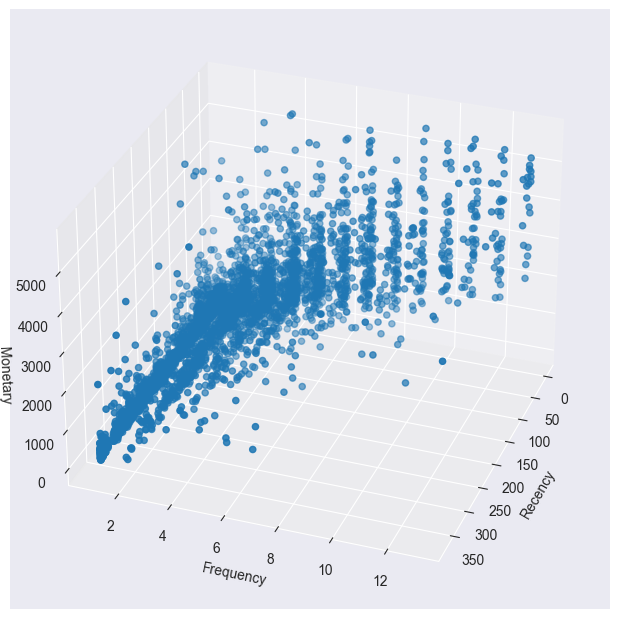

In [117]:
# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)
ax.azim = 20
ax.elev = 30

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(
    rfm_table_cleaned['Recency'].to_list(),
    rfm_table_cleaned['Frequency'].to_list(),
    rfm_table_cleaned['Monetary'].to_list()
)
# добавим оси
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary');


<div class="alert alert-success">

Что здесь можно увидеть? На самом деле, ничего конкретного. Да, видно, что есть клиенты с большими значениями параметров Monetary и Frequency — вероятно, это лучшие клиенты, которые покупают чаще всего и приносят больше всего денег. Однако по общей массе точек сложно сказать, сколько кластеров у нас есть — скорее даже кажется, что пространство не поддаётся кластеризации.

Призовём на помощь методы снижения размерности.


Начнём с метода главных компонент (PCA). Нам известно, что для его стабильной работы данные необходимо стандартизировать/нормализовать.

Давайте для удобства обернём эти шаги по предобработке данных в pipeline.

Создадим pipeline, в котором будут следующие шаги:
* стандартизация с помощью StandardScaler с параметрами по умолчанию;
* метод главных компонент с двумя компонентами.

Обучим pipeline на RFM-таблице, очищенной от выбросов, и применим к ней трансформацию.


In [118]:
rfm_features = rfm_table_cleaned[['Recency', 'Frequency', 'Monetary']]

first_pipeline = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
    ('PCA', decomposition.PCA(n_components=2))
])

rfm_table_processed = first_pipeline.fit_transform(rfm_features)

In [119]:
rfm_table_processed = pd.DataFrame(rfm_table_processed, columns=['axis-1', 'axis-2'], index=rfm_table_cleaned.index)
# Получаем объект PCA из pipeline
pca = first_pipeline.named_steps['PCA']

# Доли объясненной дисперсии для каждой компоненты
explained_variance_ratio = pca.explained_variance_ratio_

print(f"Доли объясненной дисперсии: {explained_variance_ratio}")


Доли объясненной дисперсии: [0.67747053 0.24012744]


Визуализировав пространство главных компонент после декомпозиции мы получим следующую картину:

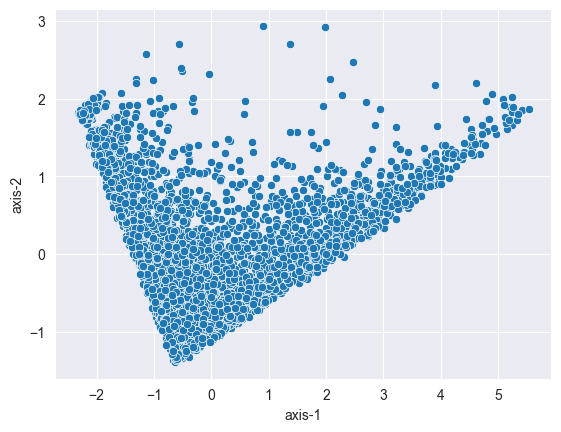

In [120]:
sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2');

Попробуем разделить это пространство главных компонент на сегменты.

> Примечание. Судя по форме пространства, мы можем с уверенностью сказать, что нам не подойдут алгоритмы, основанные на плотности, такие как DBSCAN, так как точки расположены очень близко друг к другу и большая часть точек будет определена в единый кластер, что не имеет смысла.

Попробуем воспользоваться методом k-means.

Подберём оптимальное количество кластеров для метода k-means с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно.

В качестве значения параметра random_state возьмите число 42. Остальные параметры оставим по умолчанию.

0.52


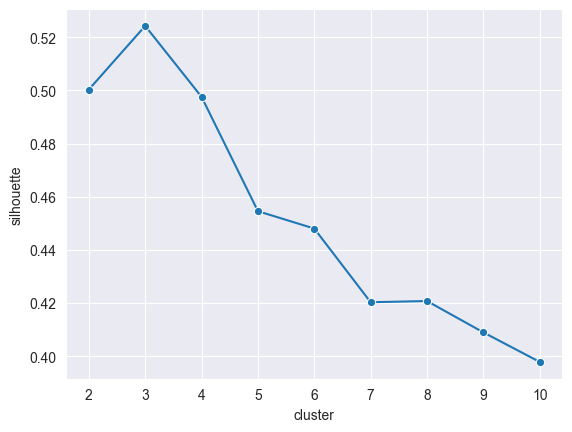

In [121]:
def get_silhouette(cluster_num, X):
    k_means =  cluster.KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = metrics.silhouette_score(X, k_means.predict(X))
    return silhouette

silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 11):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, rfm_table_processed))
    silhouette_res["cluster"].append(cluster_num)

silhouette_df = pd.DataFrame(silhouette_res)
sns.set_style("darkgrid")
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

print(silhouette_res["silhouette"][1].round(2))


Теперь возьмём EM-алгоритм.

Подберём оптимальное количество кластеров для EM-алгоритма (GaussianMixture) с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно.
В качестве значения параметра random_state возьмите число 42. Остальные параметры оставим по умолчанию.


0.44


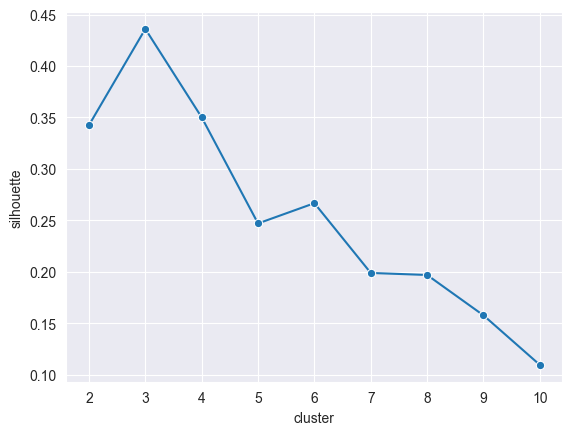

In [122]:
def get_silhouette(cluster_num, X):
    gm =  mixture.GaussianMixture(n_components=cluster_num, random_state=42)
    gm.fit(X)
    silhouette = metrics.silhouette_score(X, gm.predict(X))
    return silhouette

silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 11):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, rfm_table_processed))
    silhouette_res["cluster"].append(cluster_num)

silhouette_df = pd.DataFrame(silhouette_res)
sns.set_style("darkgrid")
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

print(silhouette_res["silhouette"][1].round(2))

Давайте посмотрим на распределение кластеров.

1) Сначала определим лучшую модель.


2) Обучим лучшую модель с подобранным ранее количеством кластеров на декомпозированных данных.



In [123]:
k_means =  cluster.KMeans(n_clusters=3, random_state=42)

k_means.fit(rfm_table_processed)

rfm_table_processed['labels'] = k_means.labels_

Визуализируем результаты кластеризации:

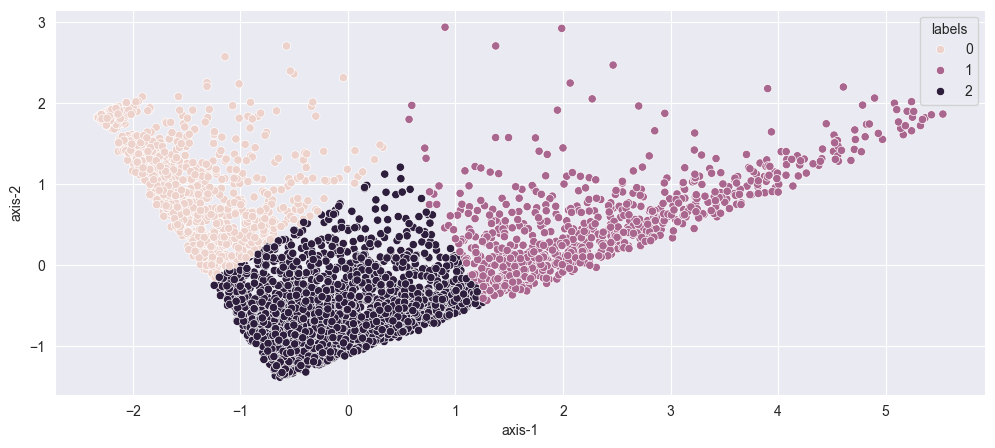

In [124]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=rfm_table_processed,
    x='axis-1',
    y='axis-2',
    hue='labels',
);

In [125]:
max_client_claster = rfm_table_processed.labels.value_counts().max()
print(f"Максимальное количество клиентов в кластере: {max_client_claster} клиентов")

Максимальное количество клиентов в кластере: 2269 клиентов


Итак, у нас есть три сегмента клиентов. Давайте попробуем составить профиль для этих сегментов.

Для составления профиля кластеров нам необходимо вернуться от декомпозированных данных к RFM-таблице, очищенной от выбросов.  Сгруппируем RFM-таблицу по полученным кластерам и рассчитаем среднее по каждому из признаков.

In [126]:
rfm_columns = ['Recency', 'Frequency', 'Monetary', 'labels']
rfm_table_cleaned['labels'] = rfm_table_processed['labels'].values
rfm_table_cleaned_group = rfm_table_cleaned[rfm_columns].groupby('labels').mean()

In [127]:
rfm_table_cleaned_group

,Recency,Frequency,Monetary
labels,,,
0,253.474474,1.403403,386.277297
1,31.943299,7.068299,2657.746997
2,51.221684,2.329220,660.068947


### Полярная диаграмма
Познакомимся с одним из способов визуализации профиля кластеров — Radar Chart (полярная, или лепестковая, диаграмма). Это графическое представление значений нескольких эквивалентных категорий в форме «паутины».
Radar Chart очень часто используется в контексте определения профиля кластеров. На концах «паутины» откладываются оси, которые соответствуют признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник.
Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На данной диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие к данному кластеру, в большей степени увлекаются музыкой (Music), а в меньшей степени — программированием (Programm).

В модуле graph_objects библиотеки plotly есть встроенная функция Scatterpolar, которая позволяет построить полярную диаграмму. На основе этой функции мы реализовали собственную функцию plot_cluster_profile(), которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У этой функции два параметра: grouped_data — сгруппированные по кластерам характеристики объектов (клиентов), n_clusters — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в реализацию функции plot_cluster_profile().

In [128]:
def plot_cluster_profile(grouped_data, n_clusters):
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаем список признаков
    features = grouped_data.columns
    # Создаем пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаем полярную диаграмму и добавляем ее на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название - номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()


Визуализируем профили кластеров в виде полярной диаграммы на основе средних RFM-характеристик, вычисленных для каждого кластера.

In [129]:
plot_cluster_profile(rfm_table_cleaned_group, 3)

<div class="alert alert-success">

Что у нас вышло:
- **Кластер 0** соответствует «потерянным» клиентам, которые купили меньше всего товара, и их последняя покупка была совершена очень давно.
- **Кластер 1** соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще всего, а давность их последней покупки наименьшая.
- **Кластер 2** соответствует «промежуточным» клиентам, которые являются активными, но покупают не так часто и много, как лояльные клиенты. В то же время эти клиенты не являются «потерянными».


<p style = "background-color : #59f068; border-radius: 5px 5px; padding : 10px"><strong>
<span style="color:#000">6. RFM-сегментация клиентов: часть 2:</span>

Итак, с помощью RFM-анализа нам удалось выделить три сегмента клиентов. Однако в маркетинге принято оперировать большим их количеством: обычно маркетологи стараются создать стратегию хотя бы для пяти-семи клиентских сегментов в градации от «лояльных» до «потерянных» с промежуточными категориями.

Поэтому, получив обратную связь от маркетологов, мы вновь принимаемся за работу, пытаясь модифицировать полученное решение.

Ранее мы производили кластеризацию в пространстве главных компонент. Вспомним, что PCA является линейным методом отображения исходного пространства признаков в его сжатую версию.

А что если использовать нелинейную трансформацию? Например, алгоритм снижения размерности t-SNE. Давайте попробуем и посмотрим, что получится.

Воспользуемся алгоритмом t-SNE и трансформируем RFM-таблицу, очищенную от выбросов, в двухмерное представление. Также заранее позаботимся о масштабировании признаков.

Давайте для удобства обернём шаги по предобработке данных в pipeline.

Создадим pipeline, который будет содержать следующие шаги:
* стандартизация с помощью StandardScaler с параметрами по умолчанию;
* алгоритм t-SNE с двумя компонентами, параметрами perplexity=50 и random_state=100.

Обучим pipeline на RFM-таблице (очищенной от выбросов), полученной ранее, и применим к ней трансформацию.

Определим чему равно значение дивергенции Кульбака — Лейблера для обученного алгоритма t-SNE? Ответ округлите до двух знаков после точки-разделителя.

**Примечание:**
Дивергенция Кульбака-Лейблера - это функция потерь, которая минимизируется при обучения алгоритма t-SNE. Она показывает меру расстояния между двумя распределениями.

Оптимальное значение данной характеристики, найденное в процессе обучения алгоритма t-SNE, хранится в атрибуте kl_divergence_ объекта класса TSNE из библиотеки sklearn. Конечно же, предварительно модель необходимо обучить, чтобы получить это значение.



In [130]:
rfm_table_cleaned = rfm_table_cleaned.set_index('CustomerID')
rfm_table_cleaned.drop('labels', axis=1, inplace=True)
rfm_table_cleaned

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40
...,...,...,...
18278,73,1,173.90
18280,277,1,180.60
18281,180,1,80.82


In [131]:
# Используем другое имя для переменной
my_pipeline = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
    ('TSNE', manifold.TSNE(perplexity=50, random_state=100))
])

rfm_table_processed = my_pipeline.fit_transform(rfm_table_cleaned)

tsne = my_pipeline.named_steps['TSNE']
print(f"KL divergence: {tsne.kl_divergence_}")

KL divergence: 0.541528046131134


Визуализировав пространство после декомпозиции с помощью t-SNE, мы получим следующую картину:


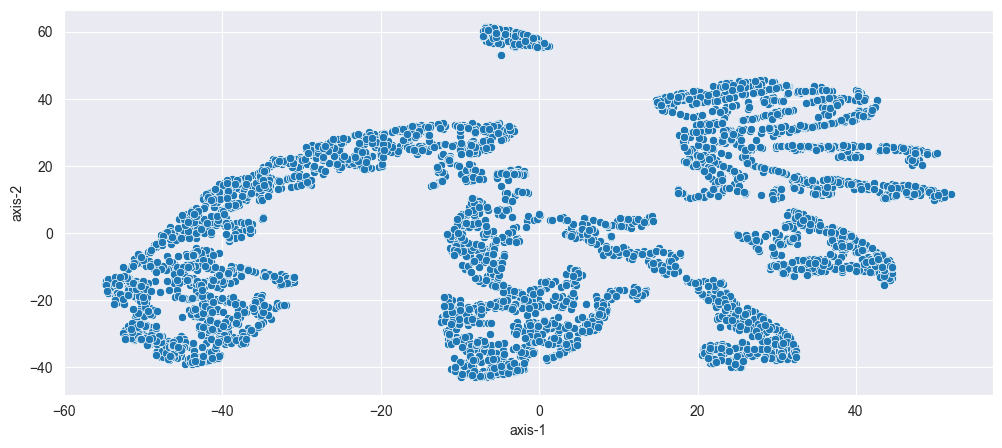

In [132]:
rfm_table_processed = pd.DataFrame(rfm_table_processed, columns=['axis-1', 'axis-2'], index=rfm_table_cleaned.index)
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2');

<div class="alert alert-success">

Как и ожидалось от t-SNE, алгоритм сгруппировал наиболее похожие объекты в подобие кластеров, причём эти кластеры легко определить.

Теперь давайте воспользуемся алгоритмами кластеризации, чтобы сформировать новые сегменты клиентов.


Воспользуемся методом k-means.
Подберём оптимальное количество кластеров для метода k-means с помощью коэффициента силуэта, перебирая возможные значения от 3 до 8 включительно.
В качестве значения параметра random_state возьмите число 42. Остальные параметры оставьте по умолчанию.

0.484


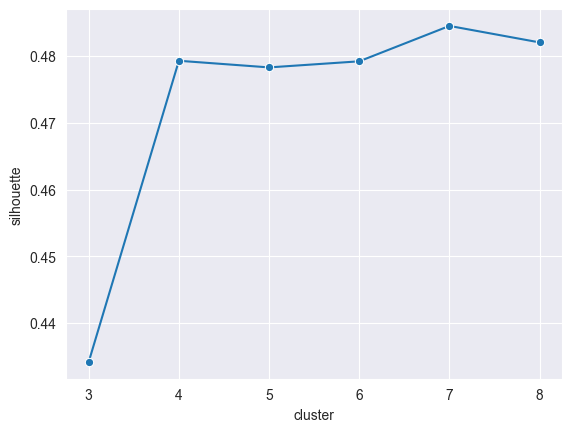

In [133]:
def get_silhouette(cluster_num, X):
    k_means =  cluster.KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = metrics.silhouette_score(X, k_means.predict(X))
    return silhouette

silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(3, 9):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, rfm_table_processed))
    silhouette_res["cluster"].append(cluster_num)

silhouette_df = pd.DataFrame(silhouette_res)
sns.set_style("darkgrid")
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

print(silhouette_res["silhouette"][4].round(3))

Теперь попробуем воспользоваться EM-алгоритом.

Подберём оптимальное количество кластеров для EM-алгоритма (GaussianMixture)  с помощью коэффициента силуэта, перебирая возможные значения от 3 до 8 включительно.

В качестве значения параметра random_state возьмём число 42. Остальные параметры оставьте по умолчанию.

0.47


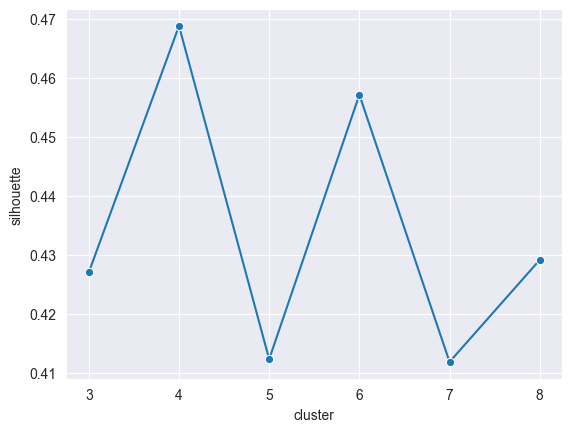

In [134]:
def get_silhouette(cluster_num, X):
    gm =  mixture.GaussianMixture(n_components=cluster_num, random_state=42)
    gm.fit(X)
    silhouette = metrics.silhouette_score(X, gm.predict(X))
    return silhouette

silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(3, 9):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, rfm_table_processed))
    silhouette_res["cluster"].append(cluster_num)

silhouette_df = pd.DataFrame(silhouette_res)
sns.set_style("darkgrid")
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

print(silhouette_res["silhouette"][1].round(2))

Теперь попробуем воспользоваться алгоритмом алгомеративной кластеризации (AgglomerativeClustering).

Подберёи оптимальное количество кластеров для алгоритма агломеративной кластеризации с помощью коэффициента силуэта, перебирая возможные значения от 2 до 8 включительно.

Все параметры, за исключением числа кластеров, оставим по умолчанию.


0.479


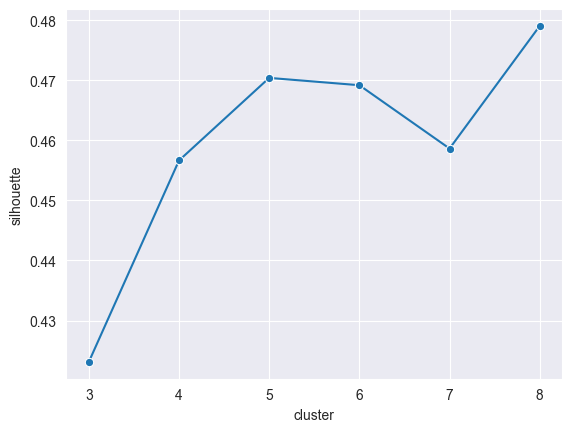

In [135]:
def get_silhouette(cluster_num, X):
    ag =  cluster.AgglomerativeClustering(n_clusters=cluster_num)
    ag.fit(X)
    silhouette = metrics.silhouette_score(X, ag.labels_)
    return silhouette

silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(3, 9):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, rfm_table_processed))
    silhouette_res["cluster"].append(cluster_num)

silhouette_df = pd.DataFrame(silhouette_res)
sns.set_style("darkgrid")
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

print(silhouette_res["silhouette"][5].round(3))

Давайте посмотрим на распределение кластеров.

1) Сначала нужно определим лучшую модель.

2) Обучим лучшую модель с подобранным ранее количеством кластеров на декомпозированных данных.



In [136]:
k_means =  cluster.KMeans(n_clusters=7, random_state=42)

k_means.fit(rfm_table_processed)

rfm_table_processed['labels'] = k_means.labels_

Визуализируем результаты кластеризации:

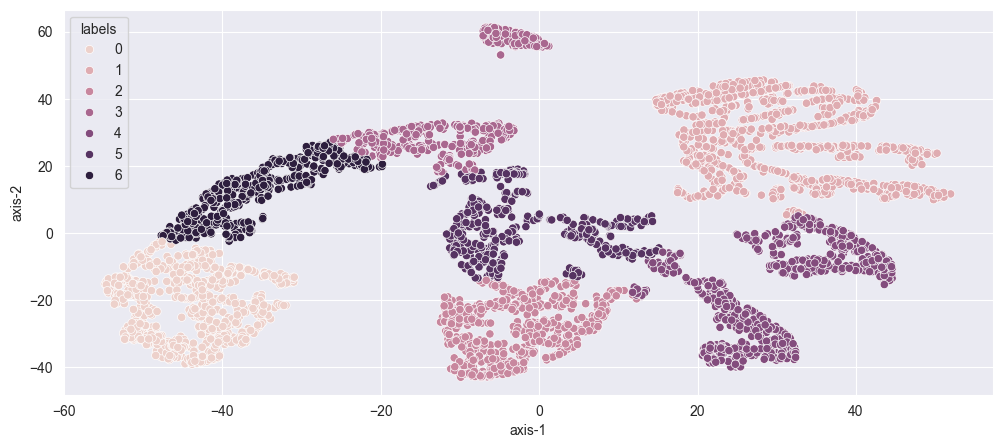

In [137]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2', hue='labels');

In [138]:
rfm_table_processed.labels.value_counts()

1    914
4    683
0    656
2    543
5    446
6    405
3    397
Name: labels, dtype: int64


Итак, у нас есть 7 сегментов клиентов. Давайте попробуем составить профиль для этих сегментов.


Для составления профиля кластеров нам необходимо вернуться от декомпозированных данных к RFM-таблице (очищенной от выбросов).

Сгруппируем RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков. Для наглядности округлим все значения в столбцах до целого числа.

In [139]:
rfm_table_cleaned['labels'] = rfm_table_processed['labels'].values
rfm_table_cleaned_group = rfm_table_cleaned.groupby('labels').mean().round()

In [140]:
rfm_table_cleaned_group

,Recency,Frequency,Monetary
labels,,,
0,46.0,1.0,322.0
1,32.0,7.0,2417.0
2,40.0,2.0,614.0
3,313.0,1.0,261.0
4,40.0,3.0,995.0
5,196.0,2.0,670.0
6,181.0,1.0,273.0


Визуализируйем профили кластеров в виде полярной диаграммы на основе средних RFM-характеристик, вычисленных для каждого кластера.


In [141]:
plot_cluster_profile(rfm_table_cleaned_group, 7)

- **Кластер 0** соответствует клиентам-«новичкам», которые относительно недавно сделали один заказ на небольшую сумму.
- **Кластер 1** соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще всего, а давность их последней покупки наименьшая.
- **Кластер 2** соответствует «подвисшим» клиентам, которые относительно недавно сделали несколько заказов на небольшие суммы. Потенциально эти клиенты могут быть переведены в кластер «перспективных».
- **Кластер 3** соответствует «потерянным» клиентам, которые купили меньше всего товара, и их последняя покупка была совершена около года назад.
- **Кластер 4** соответствует «перспективным» клиентам, которые являются активными покупателями, но покупают не так часто и не так много, как лояльные клиенты.
- **Кластер 5** соответствует клиентам «в зоне риска», которые несколько раз покупали товары на небольшие суммы, однако их последняя покупка была совершена более пяти месяцев назад.
- **Кластер 6** соответствует «спящим» или «почти потерянным» клиентам, которые сделали один заказ на маленькую сумму более пяти месяцев назад и больше не возвращались.



<p style = "background-color : #59f068; border-radius: 5px 5px; padding : 10px"><strong>
<span style="color:#000">7. RFM-кластеризация клиентов: часть 3:</span>

Мы построили модель кластеризации для части клиентов.Но как сделать предсказание сегмента для клиентов, которые не попали в обучающую выборку?

Вы, вероятно, скажете: «Воспользоваться методом predict()!»

Верно, однако всё не так просто.

Вспомним, что мы обучали наши алгоритмы кластеризации на сжатом с помощью t-SNE пространстве признаков. То есть, чтобы сделать предсказание для новых объектов, не попавших в выборку, нам необходимо будет совершить трансформацию признаков этих объектов в новое сжатое пространство.

Однако проблема t-SNE заключается в том, что алгоритм непараметрический. Это значит, что он, в отличие от таких алгоритмов, как PCA и SVD, не создаёт явной функции отображения. Проще говоря, алгоритм трансформирует пространство признаков для обучающей выборки, но не запоминает, каким образом это делает. Это значит, что, передав в алгоритм новые объекты для сжатия пространства, мы получим абсолютно новое представление пространства, не имеющее отношения к тому, что мы построили для обучающей выборки. То есть произойдёт искажение, что может привести к неверным результатам кластеризации.

Именно поэтому у класса TSNE из библиотеки sklearn нет такого метода, как transform(), у него есть только метод fit_transform() — заново обучить алгоритм t-SNE и произвести трансформацию.

Как же тогда производить кластеризацию для новых объектов, если мы не можем сжимать размерность для новых данных?

Давайте сведём задачу кластеризации к задаче классификации. Действительно, у нас теперь есть истинные метки кластеров, а есть клиенты, которые описываются RFM-характеристиками. Давайте обучим модель, которая на основе RFM-характеристик будет предсказывать клиентский сегмент.

Разделим исходные данные на тренировочную и тестовую выборки в соотношении 80/20. В качестве параметра random_state возьмите число 42.

In [142]:
X = rfm_table_cleaned.drop('labels', axis=1)
y = rfm_table_cleaned['labels']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

X_test.shape[0]

809

Дальше нам осталось только построить несколько моделей и выбрать из них лучшую.
Мы знаем, что алгоритм t-SNE является нелинейным методом понижения размерности. Можно смело предположить, что линейные модели, такие как логистическая регрессия, в данной задаче нам мало чем помогут (можете убедиться в этом самостоятельно, обучив модель логистической регрессии на тренировочной выборке и оценив качество на тестовой).

Поэтому давайте сразу возьмём тяжелую артиллерию — ансамблевые алгоритмы.


Начнём со случайного леса. С помощью GridSearchCV организуйте перебор параметров случайного леса (RandomForestClassifier) на следующей сетке параметров:

```
param_grid = {
    'max_depth': range(5, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500]
}
```
В качестве параметра random_state для модели случайного леса используйте число 42.
В качестве метрики используйте accuracy. Количество фолдов для кросс-валидации — 5.

1) Обучим GridSearchCV на тренировочной выборке.

2) С помощью лучшей модели сделаем предсказание для тестовой выборки и рассчитаем метрику accuracy.

In [143]:
param_grid = {
    'max_depth': range(5, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500]
}

grid_search = model_selection.GridSearchCV(
    estimator= ensemble.RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

%time grid_search.fit(X_train, y_train)

print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

print(metrics.accuracy_score(y_test, grid_search.best_estimator_.predict(X_test)))

CPU times: total: 1min 58s
Wall time: 1min 58s
Наилучшие значения гиперпараметров: {'criterion': 'gini', 'max_depth': 13, 'n_estimators': 200}
0.9851668726823238


Итак, значение метрики accuracy очень высокое, но не идеальное. Давайте попробуем его улучшить, воспользовавшись бустингом.

С помощью GridSearchCV организуем перебор параметров градиентного бустинга (GradientBoostingClassifier) на следующей сетке параметров:
```
param_grid = {
    'max_depth': range(3, 7),
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 500]
}
```

В качестве параметра random_state для модели градиентного бустинга используем число 42.
В качестве метрики используйте accuracy. Количество фолдов для кросс-валидации — 5.

1) Обучим GridSearchCV на тренировочной выборке.

2) С помощью лучшей модели сделаем предсказание для тестовой выборки и рассчитаем метрику accuracy.

In [144]:
param_grid = {
    'max_depth': range(3, 7),
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 500]
}

grid_search = model_selection.GridSearchCV(
    estimator= ensemble.GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

%time grid_search.fit(X_train, y_train)

print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

print(metrics.accuracy_score(y_test, grid_search.best_estimator_.predict(X_test)))

CPU times: total: 12min 6s
Wall time: 12min 8s
Наилучшие значения гиперпараметров: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
0.9826946847960445


Отлично, мы справились с проблемой непараметричности t-SNE и смогли перейти от решения задачи кластеризации к задаче классификации. Теперь у нас есть модель, которая на основе RFM-характерик клиента автоматически определяет его сегмент.

<div class="alert alert-success">

## Ключевые выводы

1. **Географическое распределение**: Большинство клиентов сосредоточены в Великобритании
2. **Сезонность**: Наибольшая выручка наблюдается в ноябре (предпраздничные покупки)
3. **Распределение по дням**: Нет транзакций в субботу (возможно выходной день)
4. **Поведенческие паттерны**: Выявлены четкие сегменты клиентов с различным покупательским поведением



## Стратегии взаимодействия

На основе выделенных сегментов можно разработать целевые маркетинговые кампании:
- **Лояльные клиенты**: программы лояльности, эксклюзивные предложения
- **Перспективные клиенты**: стимулирование повторных покупок
- **Клиенты в зоне риска**: реактивационные кампании
- **Потерянные клиенты**: специальные предложения для возврата

In [145]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
